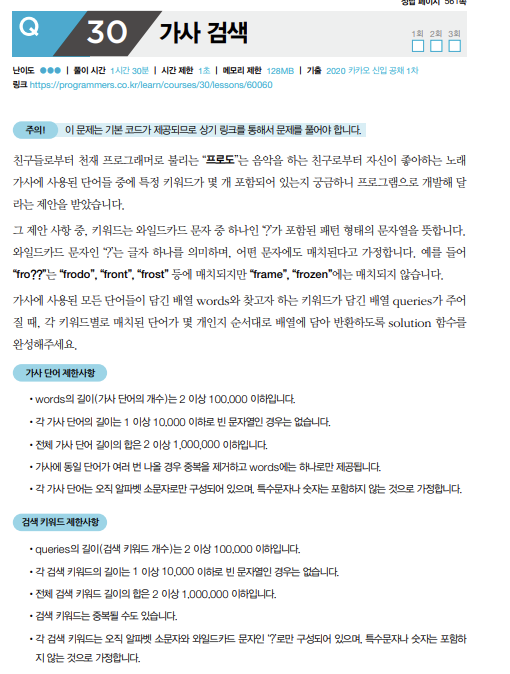

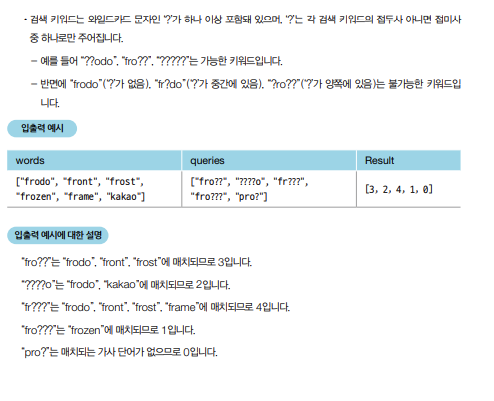

## 답지 ver

In [9]:
from bisect import bisect_left, bisect_right

# 값이 [left_value, right_value]인 데이터의 개수를 반환하는 함수
def count_by_range(a, left_value, right_value):
    right_index = bisect_right(a, right_value)
    left_index = bisect_left(a, left_value)
    return right_index - left_index

# 모든 단어들을 길이마다 나누어서 저장하기 위한 리스트
array = [[] for _ in range(10001)]
# 모든 단어들을 길이마다 나누어서 뒤집어 저장하기 위한 리스트
reversed_array = [[] for _ in range(10001)]


def solution(words, queries):
    answer = []
    for word in words: # 모든 단어를 접미사 와일드카드 배열, 접두사 와일드카드 배열에 각각 삽입
        array[len(word)].append(word) # 단어를 삽입
        reversed_array[len(word)].append(word[::-1]) # 단어를 뒤집어서 삽입

    for i in range(10001): # 이진 탐색을 수행하기 위해 각 단어 리스트 정렬 수행
        array[i].sort()
        reversed_array[i].sort()

    for q in queries: # 쿼리를 하나씩 확인하며 처리
        if q[0] != '?': # 접미사에 와일드 카드가 붙은 경우
            res = count_by_range(array[len(q)], q.replace('?', 'a'), q.replace('?', 'z'))
        else: # 접두사에 와일드 카드가 붙은 경우
            res = count_by_range(reversed_array[len(q)], q[::-1].replace('?', 'a'), q[::-1].replace('?', 'z'))
        # 검색된 단어의 개수를 저장
        answer.append(res)
        
    return answer 

In [10]:
words = ["frodo","front","frost","kakao"]
queries = ["fro??","????o","fr???","??o??"]

solution(words, queries)

[3, 2, 3, 4]